# MAC0460/MAC5832 (2020)
## EP1 -- Perceptron: toy example

Seja um conjunto de treinamento $X = \{ (\mathbf{x}^{(1)},y^{(1)}), (\mathbf{x}^{(2)},y^{(2)}), \ldots, (\mathbf{x}^{(N)},y^{(N)})\}$, $\mathbf{x}^{(i)} \in \mathbb{R}^d$ e $y^{(i)} \in \{-1, +1\}$, $i=1,2,\ldots,N$, linearmente separáveis. Dado $\mathbf{x} = (x_1, \ldots, x_d)  \in \mathbb{R}^d$, seja $\tilde{\mathbf{x}} = (1, x_1, \ldots, x_d) \in \mathbb{R}^{1+d}$.

O perceptron determina um vetor de pesos $\mathbf{w} \in \mathbb{R}^{1+d}$ de tal forma que $\mathrm{sign}(\mathbf{w}^T \tilde{\mathbf{x}}^{(i)}) = y^{(i)}$, $\forall i$, na qual 
$$
sign(z) = \left\{\begin{array}{ll}+1, & \mbox{se $z \geq 0$,}\\ -1, & \mbox{se $z < 0$.}\\
\end{array}\right.
$$

O objetivo deste EP é implementar o algoritmo perceptron para dados em $\mathbb{R}^2$ e testá-lo em casos com poucos exemplos. 


### 1. Gerar os pontos e uma target function
- o dataset consistirá de alguns ($N$) pontos definidos a mão. Alungs desses pontos serão os vértices do quadrado $[0,1]\times[0,1]$
- definiremos uma reta $f(x_1,x_2) = w_0 + w_1\,x_1 + w_2\,x_2$ que corta o quadrado $[0,1]\times [0,1]$
- aqui vamos plotar esses pontos de tal forma que os pontos $(x_1,x_2)$ tais que $f(x_1,x_2) \geq 0$ (<font color="blue">positivo</font>) são plotados em <font color="blue">azul</font> e os pontos $(x_1,x_2)$ tais que $f(x_1,x_2) < 0$ (<font color="red">negativo</font>) são plotados em <font color="red">vermelho</font>
- a classe de cada um dos $N$ pontos será portanto dado pelo sinal de $f$ 

Shape of array X:  (5, 2)
Number of examples:  5
Shape of array Xe:  (5, 3)
Target weight array:  [ 0.5 -1.   1. ]
Shape of array y:  (5,)
['red', 'blue', 'blue', 'red', 'blue']


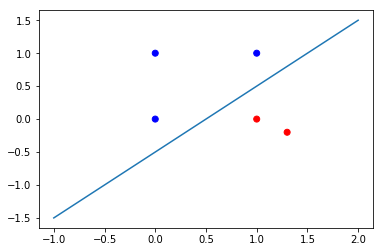

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = np.asarray([[1.3, -0.2],[0,0],[0,1],[1,0],[1,1]])
print("Shape of array X: ", X.shape)
N = X.shape[0]
print("Number of examples: ", N)

# add a left column with 1's into X -- X extended
Xe = np.hstack(( np.ones((X.shape[0],1)), X ) )
print("Shape of array Xe: ", Xe.shape)

# define a target weight vector
w_target = np.asarray([0.5, -1, 1])
print("Target weight array: ", w_target)

# define y (class) values, based on the line defined by the target weight vector
y = np.sign(np.dot(Xe, w_target))
print("Shape of array y: ", y.shape)

# Plotting ...

# plot the line
a = -w_target[1] / w_target[2] # slope  -- we will have trouble if w_target[2]=0 ...
b = -w_target[0] / w_target[2] # intercept
x_l = np.linspace(-1, 2, 50)
y_l = a*x_l + b
plt.plot(x_l, y_l);

# Determine the colors of each of the examples
colors = ["blue" if y[i]==1 else "red" for i in range(N)]
print(colors)

# plot the examples
plt.scatter(X[:,0],X[:,1],c=colors);



### Chutar uma hipótese inicial

Aqui iremos considerar um peso inicial para a função linear que sabidamente não é a função target e iremos plotar um gráfico dos exemplos com a seguinte convenção:

Cor indica o <i>ground-truth</i> (definido pela função target acima): <font color="blue">positivo</font> e <font color="red">negativo</font>  
Formato do marcador:
- o : classificados corretamente pela hipótese<br>
- x : classificados incorretamente pela hipótese<br>


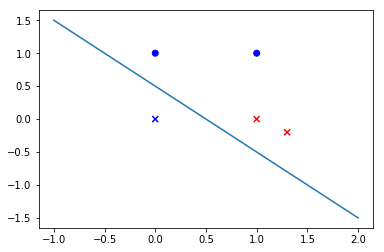

In [3]:
# Dada uma hipótese qualquer, se o sinal coincidir com o original,
# desenha-se bola, se não coincidir, desenha-se x. A cor identifica
# a classificação correta (ground-truth)

# vetor de pesos inicial
w0 = np.asarray([-0.5, 1 , 1])

# calcular yhat
yhat = np.sign(np.dot(Xe,w0))

# misclassifications
misclassified = np.where(y != yhat)[0]
correct = np.where(y == yhat)[0]

colors_o = ["blue" if y[i]==1 else "red" for i in correct]
colors_x = ["blue" if y[i]==1 else "red" for i in misclassified]


# plotting
a = -w0[1] / w0[2] # slope
b = -w0[0] / w0[2] # intercept
x_l = np.linspace(-1, 2, 50)
y_l = a*x_l + b
plt.plot(x_l, y_l);

plt.scatter(X[correct,0],X[correct,1],c=colors_o, marker='o');
plt.scatter(X[misclassified,0],X[misclassified,1],c=colors_x, marker='x');



# O algoritmo perceptron

Escreva abaixo o seu código para o algoritmo PERCEPTRON. 

Escreva a função e em seguida teste a função com os dados X, y e w0 definidos nos blocos acima.  Faça ao menos um plot do resultado final (pontos e a reta final) seguindo as cores e marcas (x, o) de acordo com a convenção acima.

<b>Opcional</b>: faça uma animação, mostrando como a reta vai mudando ao longo das iterações.

misses = [0 1 3]


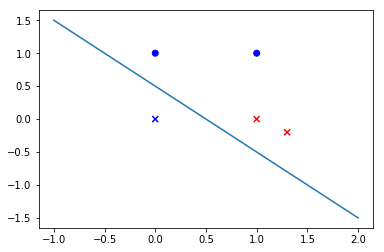

[ 1.   1.3 -0.2]
misses = [1 2 4]


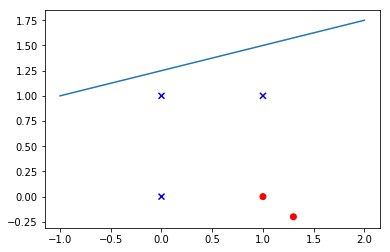

[1. 0. 0.]
misses = [1]


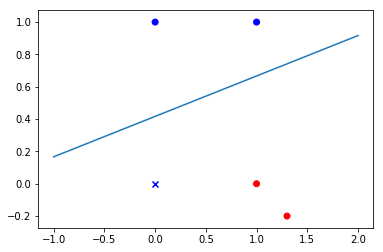

[1. 0. 0.]
misses = [3]


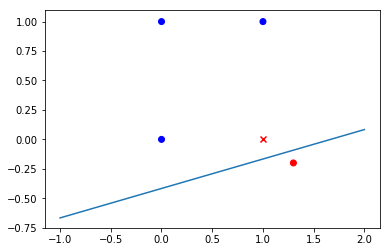

[1. 1. 0.]
misses = [1 4]


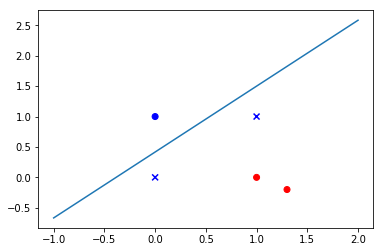

[1. 0. 0.]

wf = [ 0.5 -1.3  1.2]
misses = []


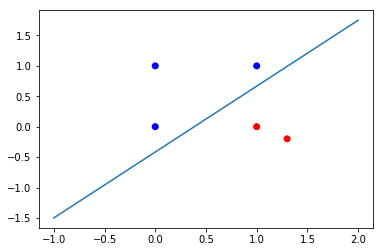

In [5]:
def draw_iter(Xe, y, w):
    # calcular yhat
    yhat = np.sign(np.dot(Xe,w))

    # misclassifications
    misclassified = np.where(y != yhat)[0]
    print("misses = " + str(misclassified))
    correct = np.where(y == yhat)[0]
    colors_o = ["blue" if y[i]==1 else "red" for i in correct]
    colors_x = ["blue" if y[i]==1 else "red" for i in misclassified]

    # plotting
    a = -w[1] / w[2] # slope
    b = -w[0] / w[2] # intercept
    x_l = np.linspace(-1, 2, 50)
    y_l = a*x_l + b
    plt.plot(x_l, y_l);
    plt.scatter(X[correct,0],X[correct,1],c=colors_o, marker='o');
    plt.scatter(X[misclassified,0],X[misclassified,1],c=colors_x, marker='x');
    plt.show()
    
def perceptron(Xe,y,w0):
    """
    Parameters:
       Xe : ndarray (N,d+1) - it already has the 1's in column 1
       y  : ndarray (N,)
       w0 : ndarray (d+1,) - the initial weight vector
       
    Returns:
       w : ndarray (d+1,) - the final weight vector
    """
    w = w0.copy()
    yhat = np.sign(np.dot(Xe,w))
    misses = np.where(y != yhat)[0]
    while(len(misses) != 0):
        draw_iter(Xe, y, w)
        el = Xe[misses[0]]
        print(el)
        w += y[misses[0]] * el
        yhat = np.sign(np.dot(Xe,w))
        misses = np.where(y != yhat)[0]
    
    return w
    
    
# test your function for w0, X and y as defined above
# Print the final weight vector and plot both the examples and
# the separating line

# vetor de pesos inicial
w0 = np.asarray([-0.5, 1 , 1])
wf = perceptron(Xe, y, w0)
print("\n===============================\nwf = " + str(wf))
draw_iter(Xe, y, wf)

# O que mais poderia ser feito ?

0. Alterar o número de pontos e/ou vetor de pesos inicial no exemplo acima e testar o código.
1. Alterar o código para funcionar para dados de dimensão $d$ arbitrária
2. Alterar o código para que o vetor de pesos inicial seja definida aleatoriamente
3. Geral os exemplos $\mathbf{x}$ de forma aleatória (talvez 2 blobs de pontos?)
4. Alterar o código para implementar a versão POCKET, para dar conta dos casos não linearmente separáveis